___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Работа с отсутствующими данными (пропущенными данными, Missing Data)

Ранее мы уже видели операции в Pandas для отсутствующих данных. Давайте применим их для очистки файла с реальными данными. Пожалуйста помните, что не существует единственного стопроцентного способа сделать такую очистку правильно. В этом блокноте мы приведём всего лишь один из примеров того, как это можно сделать для конкретного файла с данными.

#### Замечание №1: В этом разделе мы будем постепенно очищать набор данных Ames Housing Dataset и добавлять в него новые признаки, чтобы работать с ними в следующем разделе. Пожалуйста следите в этом блокноте за тем, чтобы загружать данные из файла с одним и тем же названием.

#### Замечание №2: Некоторые применённые здесь методы могут не привести к оптимальной производительности модели, они приведены для демонстрации различных доступных методов.
-----

## Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
with open('../DATA/Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Данные


In [4]:
df = pd.read_csv("/content/drive/Othercomputers/Ноутбук/курс/DATA/Ames_Housing_Data.csv")

In [5]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [6]:
len(df.columns)

81

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

### Удаление колонки PID

У нас уже есть индекс, поэтому для работы регрессии нам не нужен уникальный идентификатор PID.

In [8]:
df = df.drop('PID',axis=1)

In [9]:
len(df.columns)

80

## Признаки со значениями NaN

In [10]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [11]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [12]:
100* df.isnull().sum() / len(df)

MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
Lot Area           0.000000
Street             0.000000
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 80, dtype: float64

In [13]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [16]:
percent_nan = 100* df.isnull().sum() / len(df)
print(percent_nan)
percent_nan = percent_nan[percent_nan>0].sort_values()
type(percent_nan)

MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
Lot Area           0.000000
Street             0.000000
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 80, dtype: float64


pandas.core.series.Series

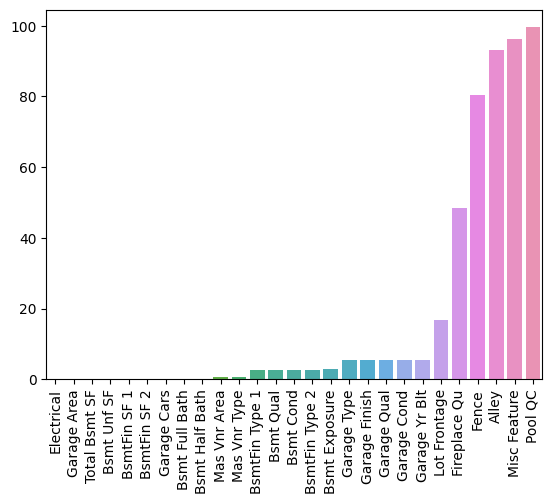

In [18]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Удаление признаков или удаление строк

Если значения отсутствуют только в нескольких строках, количество которых мало по сравнению с общим количеством строк, то можно рассмотреть вариант удалить такие строки. К чему это приведёт с точки зрения точности работы модели? По сути, мы удаляем некоторые данные для обучения и тестирования, но поскольку таких строк очень мало, то скорее всего мы не сильно повлияем на точность модели.

Если же значения отсутствуют почти во всех строках, то имеет смысл полностью удалить такие признаки. Однако перед этим следует внимательно разобраться, почему неопределённых значений так много. В некоторых случаях можно рассмотреть такие данные как отдельную категорию, отдельно от остальных данных.

В качестве примера возьмём признак "количество машин, которые могут поместиться в гараже". Но если гаража вообще нет, то вместо значения 0 может проставляться неопределённое значение null. В таким случае имеет смысл заменить значения null на нули. Только Вы можете решить, что делать с неопределёнными значениями! Используйте Ваши знания о предметной области и специфике данных!

## Работа с отсутствующими данными в строках

## Заменять данные чем-то, или удалять данные?

Давайте поймём, в каких случаях лучше заменять отсутствующие данные какими-то значениями (например, средним значением), а в каких случаях удалять такие строки. Давайте выберем некоторое пороговое значение (threshold) и договоримся, что при его привышении мы решаем удалять строки (вместо того, чтобы заменять отсутствующее значение каким-то другим значением). Мы выберем пороговое значение 1%. Это значит, что если меньше 1% строк содержат неопределённое значение какого-то признака, то мы просто удалим такие строки. Здесь нет правильного ответа на вопрос, какое следует выбрать пороговое значение. Можете использовать знания о специфике предметной области, но в любом случае пороговое значение не должно быть очень большим, например 50%.

Глядя на текстовое описание признаков, мы видим, что в нашем случае значения NaN проставляются намеренно - они означают 0 или "нисколько".

## Пример замены (заполнения) данных

(0.0, 1.0)

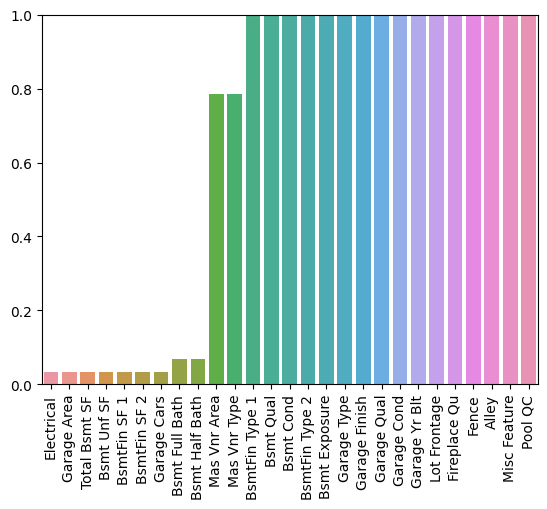

In [19]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1%
plt.ylim(0,1)

Далее на основе этих данных мы или удалим строки, или заменим отсутствующие данные некоторыми значениями. Посмотрите видео-лекцию для более подробного рассказа по этой теме.

In [20]:
# Сравниваем с пороговым значением
percent_nan[percent_nan < 1]

Electrical        0.034130
Garage Area       0.034130
Total Bsmt SF     0.034130
Bsmt Unf SF       0.034130
BsmtFin SF 1      0.034130
BsmtFin SF 2      0.034130
Garage Cars       0.034130
Bsmt Full Bath    0.068259
Bsmt Half Bath    0.068259
Mas Vnr Area      0.784983
Mas Vnr Type      0.784983
dtype: float64

In [21]:
100/len(df)

0.034129692832764506

In [22]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [23]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


**Заполняем данные на основе названий колонок. Здесь у нас есть два типа 2 признаков - числовые признаки и текстовые описания.**

Числовые колонки:

In [24]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

Текстовые колонки:

In [25]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [26]:
percent_nan = percent_missing(df)

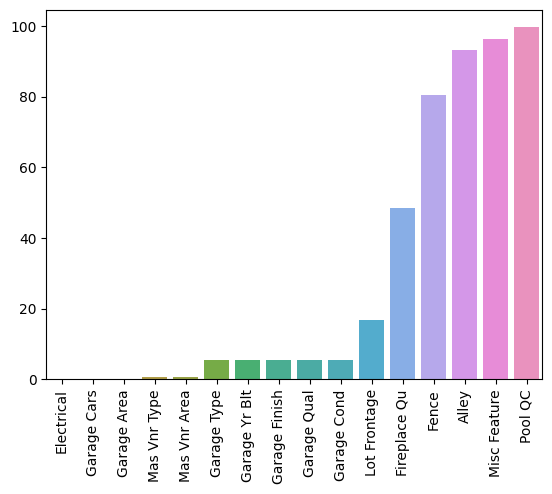

In [27]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Удаление строк

Некоторые признаки имеют только одну-две строки с отсутствующими значениями. На основе файла .txt с описанием признаков нашего набора данных, мы могли бы легко заполнить эти данные некоторыми значениями, и это было бы отличное решение. Однако здесь давайте покажем Вам, как удалять такие строки - это пригодится в тех случаях, когда у Вас нет хорошей интерпретации того, что означают отсутствующие значения.

    df.dropna() ---
        subset : array-like, optional
                Labels along other axis to consider, e.g. if you are dropping rows
                these would be a list of columns to include.

In [28]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [29]:
percent_nan = percent_missing(df)

(0.0, 1.0)

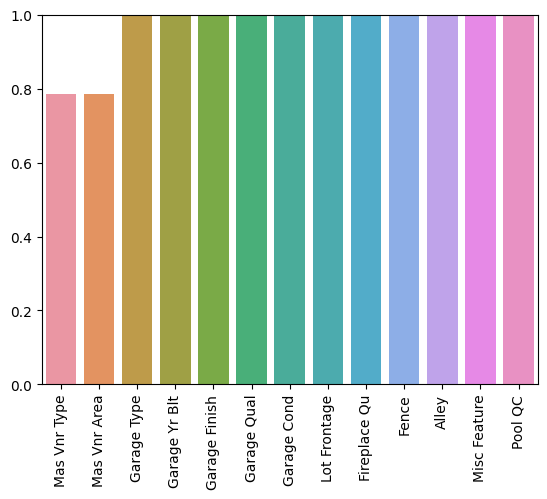

In [30]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

### Признак "Mas Vnr"

На основе текстового описания набора данных, отсутствие данных в признаках Mas Vnr Type и Mas Vnr Area скорее всего означает, что дом не имеет облицовки каменной плиткой, и в этом случае мы укажем нулевое значение, как мы делали раньше для других признаков.

In [31]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [32]:
percent_nan = percent_missing(df)

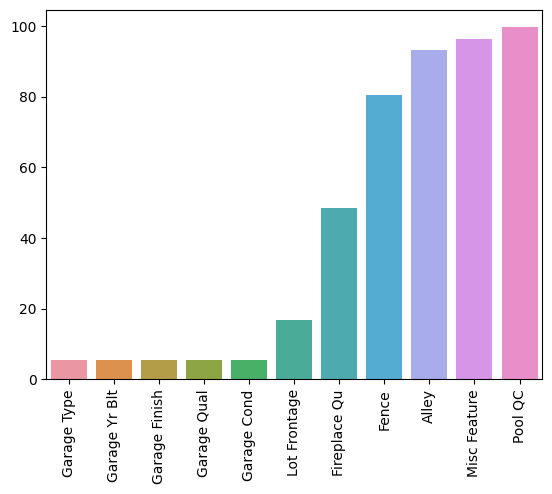

In [33]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Работа с отсутствующими данными в колонках

Ранее мы смотрели на отсутствие данных в строках; теперь посмотрим на колонки признаков, поскольку здесь есть достаточно большой процент отсутствующих значений.

### Колонки Garage

Судя по описанию данных, значение NaN означает отсутствие гаража, так что мы запишем значение "None" или 0.

In [34]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


In [35]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [36]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [37]:
percent_nan = percent_missing(df)

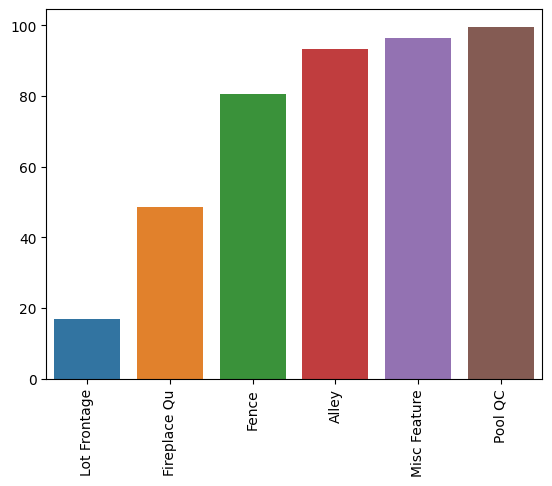

In [38]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Удаление колонок с признаками

Если значения отсутствуют в достаточно большом количестве строк, то имеет смысл удалить такие колонки полностью. Например, если 99% строк имеют неопределённое значение в каком-то признаке, то этот признак не сможет использоваться для предсказывания целевой переменной, поскольку почти все данные в этом признаке неопределены. В нашем наборе данных, многие из признаков с большим количеством значений NaN по сути должны содержать значения "none" или 0. Но чтобы показать Вам различные варианты работы с отсутствующими значениями, мы удалим эти признаки вместо того, чтобы заполнить отсутствующие значения нулями или "none".

In [39]:
percent_nan.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [40]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2925,37.0,NaN,GdPrv,NaN,NaN,NaN
2926,NaN,NaN,MnPrv,NaN,NaN,NaN
2927,62.0,NaN,MnPrv,NaN,Shed,NaN
2928,77.0,TA,NaN,NaN,NaN,NaN


In [41]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [42]:
percent_nan = percent_missing(df)

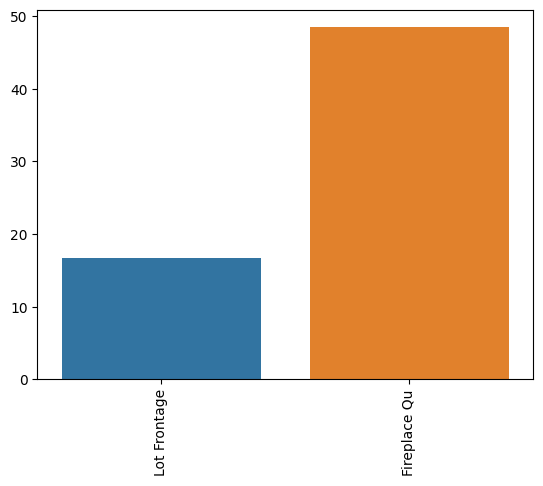

In [43]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Заполняем колонку Fireplace Quality на основе текстового описания

In [44]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [45]:
percent_nan = percent_missing(df)

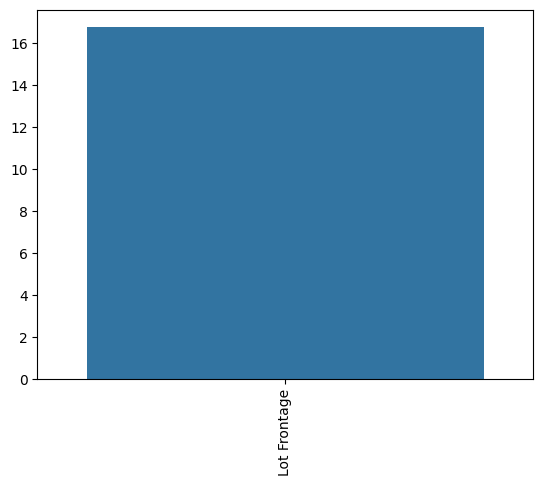

In [46]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Замена отсутствующих данных каким-то другим значением

Чтобы заменить отсутствующие данные в заданном признаке, нам нужно решить, какой из других признаков (без значений NaN) лучше всего коррелирует с нашим признаком. В нашем примере мы будем работать со следующими признаками:

Neighborhood: районы внутри городской черты Ames

LotFrontage: ширина фронтальной стороны дома (со стороны улицы), в футах

Мы будем работать в предположении, что признак Lot Frontage коррелирует с признаком neighborhood.

In [47]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

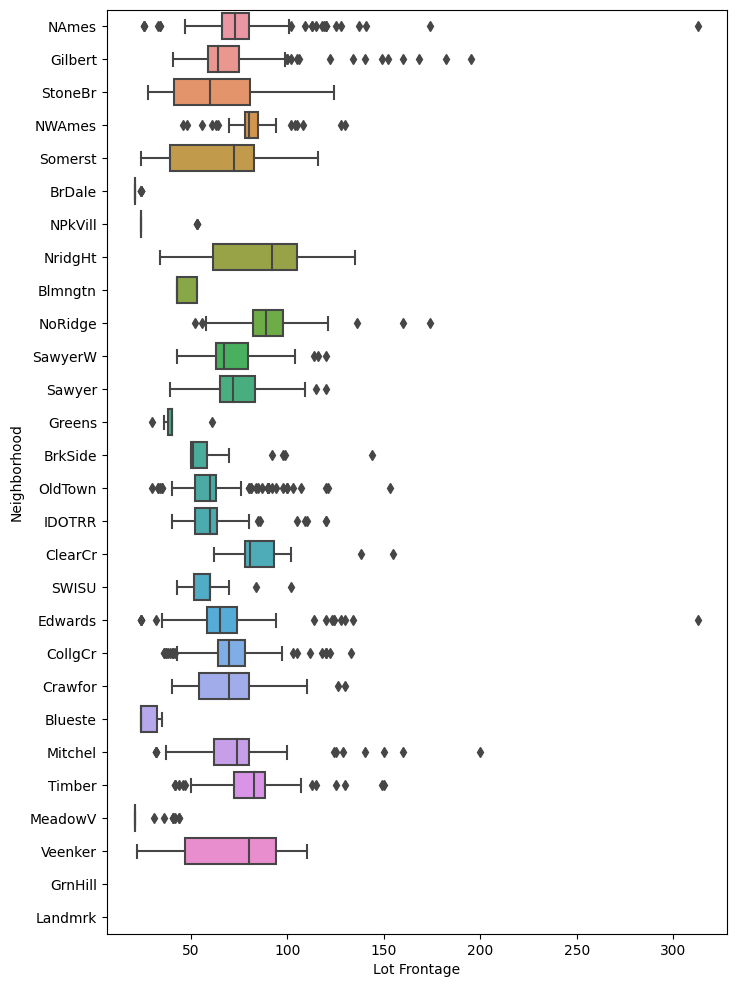

In [48]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

## Замена отсутствующих данных на основе других признаков

Есть и более сложные методы, но обычно чем проще метод, тем лучше. Тогда мы можем не создавать модели поверх других моделей.

Про дополнительные методы замены отсутствующих значений можно почитать в этой статье: https://scikit-learn.org/stable/modules/impute.html

In [64]:
df.groupby('Neighborhood').mean()

<ipython-input-64-af4695443023>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Neighborhood').mean()


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Blmngtn,109.285714,46.900000,3399.357143,7.142857,5.000000,2005.035714,2005.464286,41.642857,327.642857,0.000000,...,136.035714,20.071429,0.000000,0.000000,10.285714,0.000000,0.000000,6.142857,2007.428571,196661.678571
Blueste,148.000000,27.300000,2346.500000,6.600000,5.800000,1982.600000,1983.800000,0.000000,293.300000,61.200000,...,170.100000,11.700000,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,2008.600000,143590.000000
BrDale,160.000000,21.500000,1840.633333,5.733333,5.433333,1971.833333,1973.000000,363.900000,259.066667,9.800000,...,77.533333,6.400000,0.000000,0.000000,0.000000,0.000000,0.000000,6.200000,2007.633333,105608.333333
BrkSide,48.518519,55.789474,6959.777778,5.120370,6.212963,1932.361111,1968.370370,10.861111,198.750000,19.666667,...,46.175926,24.833333,39.009259,2.722222,13.981481,0.000000,41.388889,5.759259,2007.842593,124756.250000
ClearCr,51.363636,88.150000,24842.250000,5.977273,5.545455,1966.818182,1980.318182,89.681818,584.613636,196.431818,...,181.840909,61.477273,33.522727,2.954545,33.863636,0.000000,20.454545,6.250000,2007.840909,208662.090909
CollgCr,42.134831,71.336364,9999.752809,6.677903,5.239700,1997.921348,1999.213483,97.468165,489.565543,27.498127,...,118.191011,52.692884,2.333333,1.456929,6.797753,0.000000,26.029963,6.112360,2007.700375,201803.434457
Crawfor,59.805825,69.951807,11650.106796,6.271845,6.300971,1946.766990,1978.233010,92.291262,471.126214,62.834951,...,63.980583,32.990291,53.582524,8.320388,40.650485,2.213592,42.718447,6.533981,2007.621359,207550.834951
Edwards,55.283505,66.910112,10355.536082,5.051546,5.500000,1956.938144,1974.371134,49.412371,409.958763,46.654639,...,70.731959,33.793814,25.211340,0.927835,16.865979,6.278351,122.783505,5.865979,2007.798969,130843.381443
Gilbert,58.000000,74.207207,11342.369697,6.515152,5.090909,1998.303030,1998.993939,39.175758,244.036364,0.684848,...,105.145455,41.078788,3.454545,5.254545,4.545455,0.000000,32.848485,6.296970,2007.696970,190646.575758


In [50]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    66.910112
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

## Трансформация колонки

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html

In [51]:
df.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [52]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,228000
2897,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,250000
2898,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Normal,202000
2912,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,146500


In [66]:
df.iloc[21:26]['Lot Frontage']

21    85.000000
22    64.549383
23    75.210667
24    75.210667
25    65.000000
Name: Lot Frontage, dtype: float64

In [54]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2925     37.000000
2926     75.144444
2927     62.000000
2928     77.000000
2929     74.000000
Name: Lot Frontage, Length: 2928, dtype: float64

In [55]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean())).iloc[21:26]

21    85.000000
22    64.549383
23    75.210667
24    75.210667
25    65.000000
Name: Lot Frontage, dtype: float64

In [56]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [57]:
percent_nan = percent_missing(df)

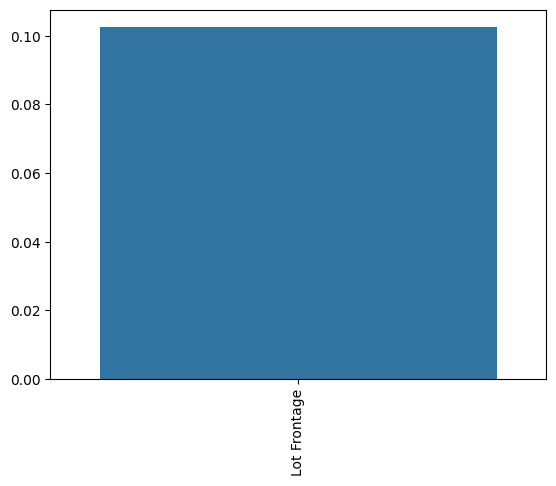

In [58]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [59]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [60]:
percent_nan = percent_missing(df)

In [61]:
percent_nan

Series([], dtype: float64)

Отлично! Теперь во всём нашем наборе данных нет отсутствующих значений! Имейте ввиду, что все такие трансформации лучше реализовывать в виде функций, которые потом можно легко использовать. А теперь давайте сохраним наш набор данных:

In [62]:
df.to_csv("../DATA/Ames_NO_Missing_Data.csv",index=False)

OSError: ignored

----